**Purpose:** Create a Logistic Regression Model & Analyze Results

In [28]:
import pandas as pd
import numpy as np
import os

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
#from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot

In [2]:
pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',1000)

In [3]:
file = 'patient_profiles_final.csv'
filepath = os.getcwd()+'/output/'+file

df_pat = pd.read_csv(filepath)

file = 'biomarkers_final_chi.csv'
filepath = os.getcwd()+'/output/'+file

df_bio = pd.read_csv(filepath)

file = 'targets.csv'
filepath = os.getcwd()+'/input/'+file

df_t = pd.read_csv(filepath)

In [4]:
df_t.groupby('target_label').agg({'patient_id':'count'})

,patient_id
target_label,
0,1353
1,381


In [5]:
print('Only ',round((381/len(df_t))*100,2),'% have the target variable')

Only  21.97 % have the target variable


### Combine Into Model Dataset

In [6]:
#for the time being, will not consider bmi, alcohol and exercise

pat_categories = ['demographics_age','patient_id','status_disease_sub_type','status_smoking_status_fixed','demographics_gender_fixed','demographics_race_fixed','status_months_since_diagnosis_fixed']

df_model = pd.merge(df_t, df_pat[pat_categories],on='patient_id',how='inner')

df_model = pd.merge(df_model,df_bio,on='biomarker_id',how='inner')

In [7]:
df_model.head()

,patient_id,biomarker_id,target_label,demographics_age,status_disease_sub_type,status_smoking_status_fixed,demographics_gender_fixed,demographics_race_fixed,status_months_since_diagnosis_fixed,BM00100,BM00112,BM00422,BM00568,BM00606,BM00694,BM00869,BM01029,BM01031,BM01046,BM01227,BM01280,BM01633,BM01742,BM01811,BM01821,BM01839,BM01929,BM02084,BM02126,BM02144,BM02221,BM02293,BM02427,BM02430,BM02482,BM02677,BM02733,BM02803,BM02884,BM02959,BM03171,BM03231,BM03260,BM03269,BM03309,BM03338,BM03359,BM03449,BM03454,BM03741,BM03766,BM03802,BM03942,BM03977,BM04017,BM04137,BM04205,BM04338,BM04394,BM04446,BM04489,BM04512,BM04792,BM05069,BM05104,BM05271,BM05369,BM05714,BM05719,BM05897,BM05903,BM05950,BM05997,BM06003,BM06177,BM06264,BM06281,BM06347,BM06353,BM06365,BM06455,BM06503,BM06509,BM06511,BM06652,BM06688,BM06803,BM06927,BM07024,BM07140,BM07173,BM07413,BM07546,BM08056,BM08078,BM08083,BM08107,BM08154,BM08196,BM08405,BM08470,BM08611,BM08809,BM08883,BM08936,BM09138,BM09317,BM09364,BM09395,BM09443,BM09537,BM09569,BM09573,BM09581,BM09650,BM09665,BM09861,BM09901,BM10007,BM10168,BM10257,BM10274,BM10301,BM10310,BM10384,BM10406,BM10482,BM10516,BM10541,BM10582,BM10602,BM10674,BM11304,BM11349,BM11481,BM11550,BM11703,BM11816,BM11831,BM11867,BM11933,BM12072,BM12180,BM12234,BM12296,BM12316,BM12328,BM12347,BM12546,BM12577,BM12607,BM12664,BM12667,BM12689,BM12819,BM12943,BM13030,BM13051,BM13079,BM13118,BM13190,BM13225,BM13503,BM13553,BM13573,BM13800,BM13900,BM13934,BM14192,BM14224,BM14353,BM14368,BM14377,BM14467,BM14515,BM14618,BM14619,BM14679,BM14928,BM15131
0,1002df1d3,89c43bb4,0,46.0,A,FORMER,M,ASIAN,20.0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1,1010441f,3ae31327,0,52.0,A,NEVER,M,BLACK OR AFRICAN AMERICAN,0.0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,101eb6af1,1d8f7bab9,0,55.0,B,NEVER,F,WHITE,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,10204394e,129ee8c6c,0,69.0,A,NEVER,M,WHITE,9.0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0
4,1021d329b,1b44145bd,0,52.0,A,FORMER,M,ASIAN,10.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0


### Analyze Final Dataset

In [8]:
df_model[['target_label','demographics_age','status_months_since_diagnosis_fixed']].groupby('target_label').mean()

,demographics_age,status_months_since_diagnosis_fixed
target_label,,
0,59.399143,6.021434
1,61.303795,10.110236


In [9]:
df_model[['target_label','status_disease_sub_type']].groupby('status_disease_sub_type').mean()

,target_label
status_disease_sub_type,
A,0.221453
B,0.210117
C,0.196319
D,0.274510
E,0.200000
F,0.263158


In [10]:
df_model[['target_label','status_smoking_status_fixed']].groupby('status_smoking_status_fixed').mean()

,target_label
status_smoking_status_fixed,
CURRENT,0.290023
FORMER,0.212308
NEVER,0.172952
UNKNOWN,0.258373


In [11]:
df_model[['target_label','demographics_gender_fixed']].groupby('demographics_gender_fixed').mean()

,target_label
demographics_gender_fixed,
F,0.264706
M,0.182773


In [12]:
df_model[['target_label','demographics_race_fixed']].groupby('demographics_race_fixed').mean()

,target_label
demographics_race_fixed,
AMERICAN INDIAN OR ALASKA NATIVE,0.181818
ASIAN,0.207317
BLACK OR AFRICAN AMERICAN,0.208075
NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER,0.277778
WHITE,0.223954


### Preprocessing - Encoding Patient Profile Columns

In [13]:
#one-hot encode

categories = ['status_disease_sub_type','status_smoking_status_fixed','demographics_race_fixed']

df_cat = pd.get_dummies(df_model[categories])

#change gender to binomial

df_model['gender'] = np.where(df_model['demographics_gender_fixed'] == 'F',1,0)

In [14]:
df_model = df_model.drop(categories, axis=1)
df_model = df_model.drop('demographics_gender_fixed',axis=1)

df_model = pd.merge(df_model, df_cat, left_index=True, right_index=True)

In [15]:
df_model.head()

,patient_id,biomarker_id,target_label,demographics_age,status_months_since_diagnosis_fixed,BM00100,BM00112,BM00422,BM00568,BM00606,BM00694,BM00869,BM01029,BM01031,BM01046,BM01227,BM01280,BM01633,BM01742,BM01811,BM01821,BM01839,BM01929,BM02084,BM02126,BM02144,BM02221,BM02293,BM02427,BM02430,BM02482,BM02677,BM02733,BM02803,BM02884,BM02959,BM03171,BM03231,BM03260,BM03269,BM03309,BM03338,BM03359,BM03449,BM03454,BM03741,BM03766,BM03802,BM03942,BM03977,BM04017,BM04137,BM04205,BM04338,BM04394,BM04446,BM04489,BM04512,BM04792,BM05069,BM05104,BM05271,BM05369,BM05714,BM05719,BM05897,BM05903,BM05950,BM05997,BM06003,BM06177,BM06264,BM06281,BM06347,BM06353,BM06365,BM06455,BM06503,BM06509,BM06511,BM06652,BM06688,BM06803,BM06927,BM07024,BM07140,BM07173,BM07413,BM07546,BM08056,BM08078,BM08083,BM08107,BM08154,BM08196,BM08405,BM08470,BM08611,BM08809,BM08883,BM08936,BM09138,BM09317,BM09364,BM09395,BM09443,BM09537,BM09569,BM09573,BM09581,BM09650,BM09665,BM09861,BM09901,BM10007,BM10168,BM10257,BM10274,BM10301,BM10310,BM10384,BM10406,BM10482,BM10516,BM10541,BM10582,BM10602,BM10674,BM11304,BM11349,BM11481,BM11550,BM11703,BM11816,BM11831,BM11867,BM11933,BM12072,BM12180,BM12234,BM12296,BM12316,BM12328,BM12347,BM12546,BM12577,BM12607,BM12664,BM12667,BM12689,BM12819,BM12943,BM13030,BM13051,BM13079,BM13118,BM13190,BM13225,BM13503,BM13553,BM13573,BM13800,BM13900,BM13934,BM14192,BM14224,BM14353,BM14368,BM14377,BM14467,BM14515,BM14618,BM14619,BM14679,BM14928,BM15131,gender,status_disease_sub_type_A,status_disease_sub_type_B,status_disease_sub_type_C,status_disease_sub_type_D,status_disease_sub_type_E,status_disease_sub_type_F,status_smoking_status_fixed_CURRENT,status_smoking_status_fixed_FORMER,status_smoking_status_fixed_NEVER,status_smoking_status_fixed_UNKNOWN,demographics_race_fixed_AMERICAN INDIAN OR ALASKA NATIVE,demographics_race_fixed_ASIAN,demographics_race_fixed_BLACK OR AFRICAN AMERICAN,demographics_race_fixed_NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER,demographics_race_fixed_WHITE
0,1002df1d3,89c43bb4,0,46.0,20.0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1,1010441f,3ae31327,0,52.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,101eb6af1,1d8f7bab9,0,55.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3,10204394e,129ee8c6c,0,69.0,9.0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,1021d329b,1b44145bd,0,52.0,10.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,

In [16]:
model = df_model.drop(['patient_id','biomarker_id'],axis=1)

In [17]:
X = model.drop('target_label',axis=1)
y = model['target_label']

### Logistic Regression Model

In [18]:
seed = 7
test_size = 0.25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.92


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Model Results

In [19]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[320  15]
 [ 20  79]]


In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       335
           1       0.84      0.80      0.82        99

    accuracy                           0.92       434
   macro avg       0.89      0.88      0.88       434
weighted avg       0.92      0.92      0.92       434



Logistic: f1=0.819 auc=0.898


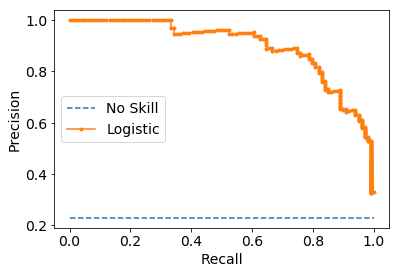

In [30]:
lr_prec, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, y_pred), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_prec, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Model: ROC AUC=0.500
Logistic Regression: ROC AUC=0.962


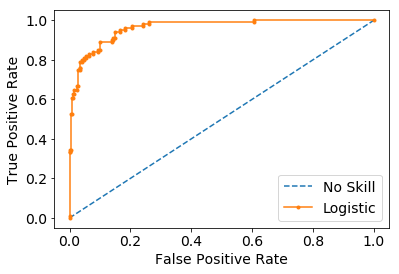

In [24]:
# no model
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = logreg.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Model: ROC AUC=%.3f' % (ns_auc))
print('Logistic Regression: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
#Visuals templates from: https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/